# PWC Clients - Forage Internship - Phone marketing algorithm predicts

"A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 

Management is now interested in finding out how a classification model can lead to certain decision-making processes." Pwc 

### Download and client the data and do EDA (exploratory data analysis)

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [101]:
df = pd.read_csv(fr"C:\Users\lhoan\OneDrive\Bureau\Pwc - Forage\bank-additional-full.csv",sep=";")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Since we aim to predict whether or not a client, targeted by the campaign, subscribes to a term deposit (y) after a phone call, we can exclude the 'duration' of the call from the model, as it occurs after the target event.

In [102]:
df.drop('duration', axis=1, inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

(There are no missing values (all of they are handle with 'unknown' etc)

In [104]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [105]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [106]:
df.shape

(41188, 20)

In [107]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
column marital: ['married' 'single' 'divorced' 'unknown']
column education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
column default: ['no' 'unknown' 'yes']
column housing: ['no' 'yes' 'unknown']
column loan: ['no' 'yes' 'unknown']
column contact: ['telephone' 'cellular']
column month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 2

### Deep dive into the data (correlation heatmap, plots etc)

First tranform our target variable (y) into numerical values

In [108]:
#first transform y into numerical value 
df['y']=df['y'].replace({'yes':1,'no':0})
df['y'].unique()
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


We can see that we have an umbalanced dataset, with a mean of 10% of y=1 (sucess) and y=0 (no) with 90%

##### Check if there is a linear relationship with the target variable

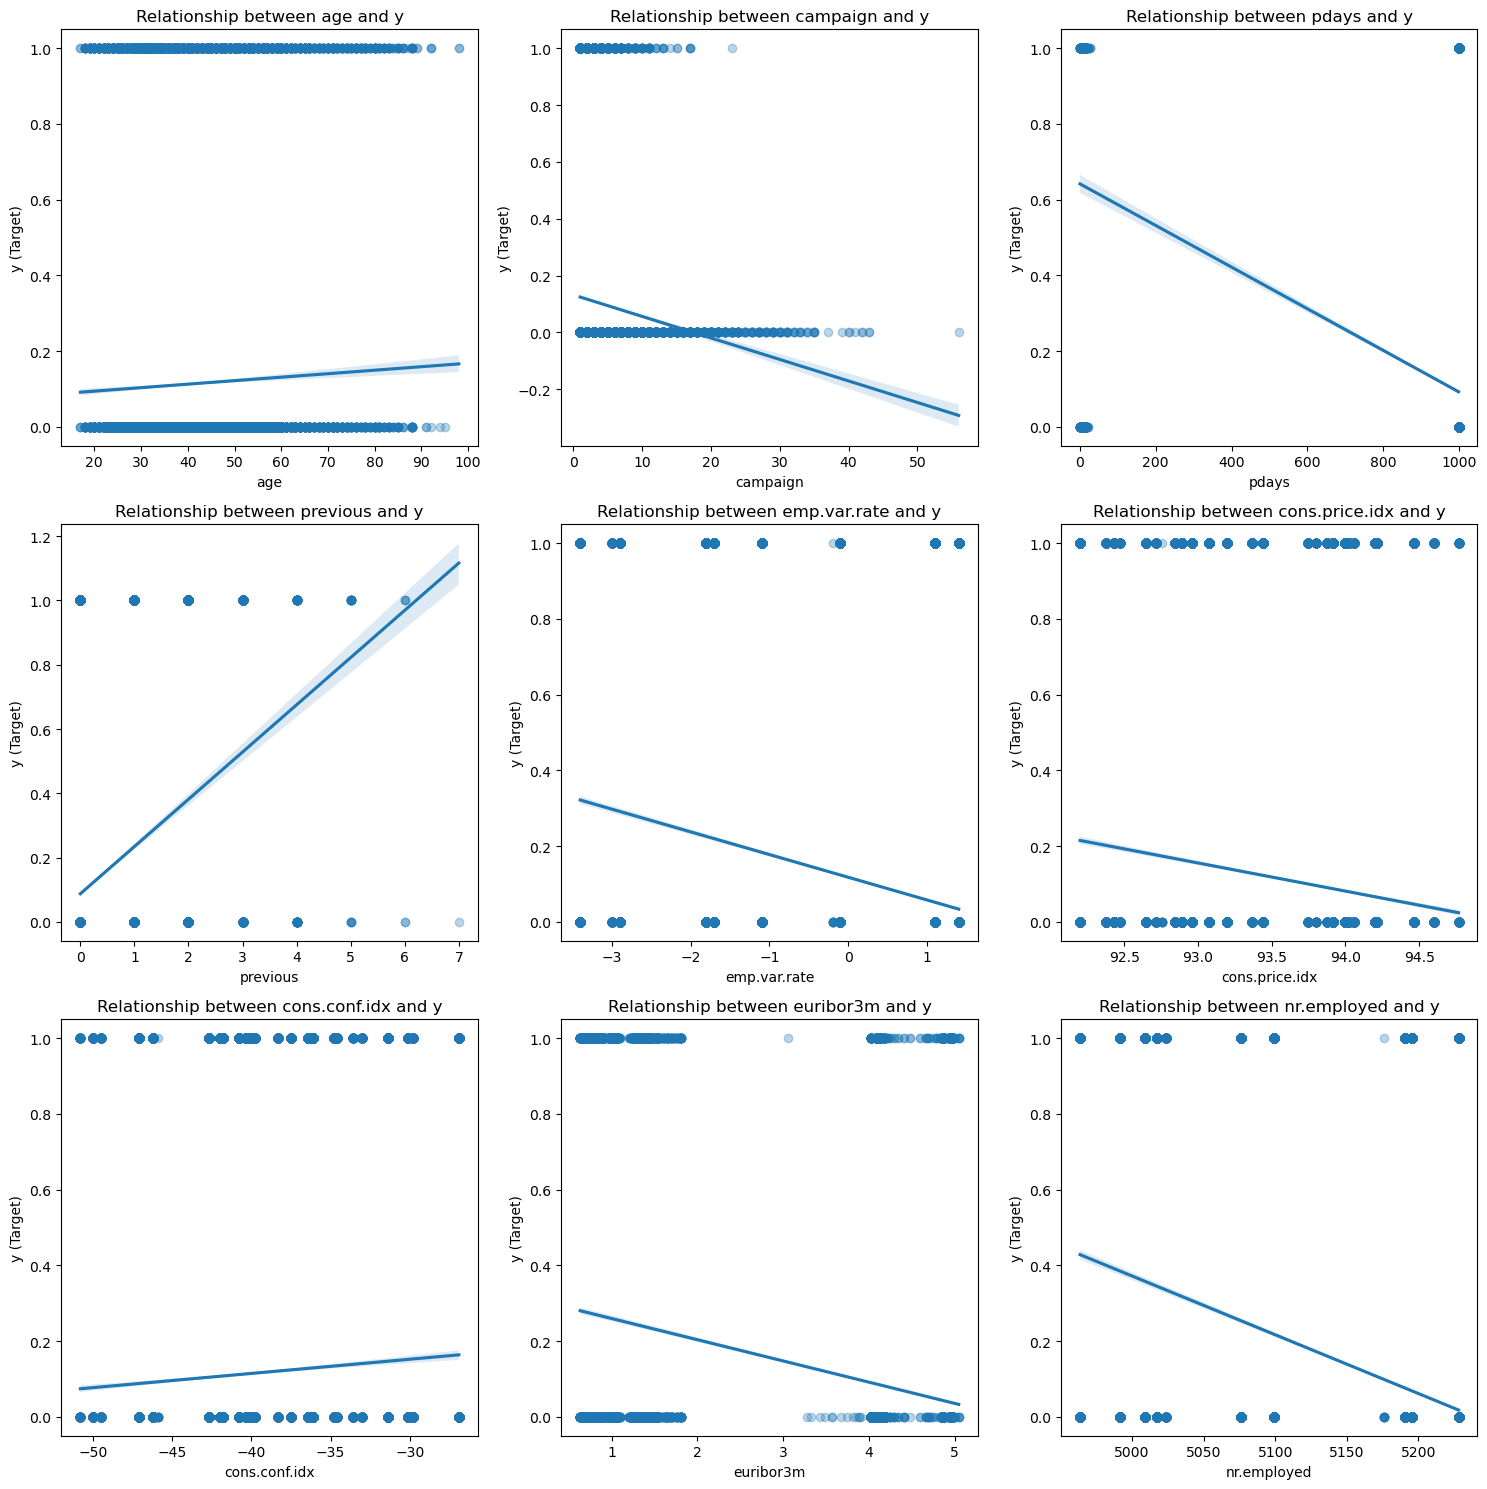

In [109]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)  # Ceiling division to get the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  
axes = axes.flatten()  # Flatten in case of single row/column

for idx, i in enumerate(col):
    sns.regplot(x=df[i], y=df['y'], scatter_kws={'alpha':0.3}, ax=axes[idx])    #alpha=0.5, ax=axes[idx]
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel('y (Target)')
    axes[idx].set_title(f'Relationship between {i} and y')

# Remove empty subplots if the number of columns is not a multiple of 3
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

Seems that most of the features have some linear relationship with the target. So, could use logistic regression, and do not need to log linearize for the baseline model first.

#### Barplots of the variables to see how they are distributed

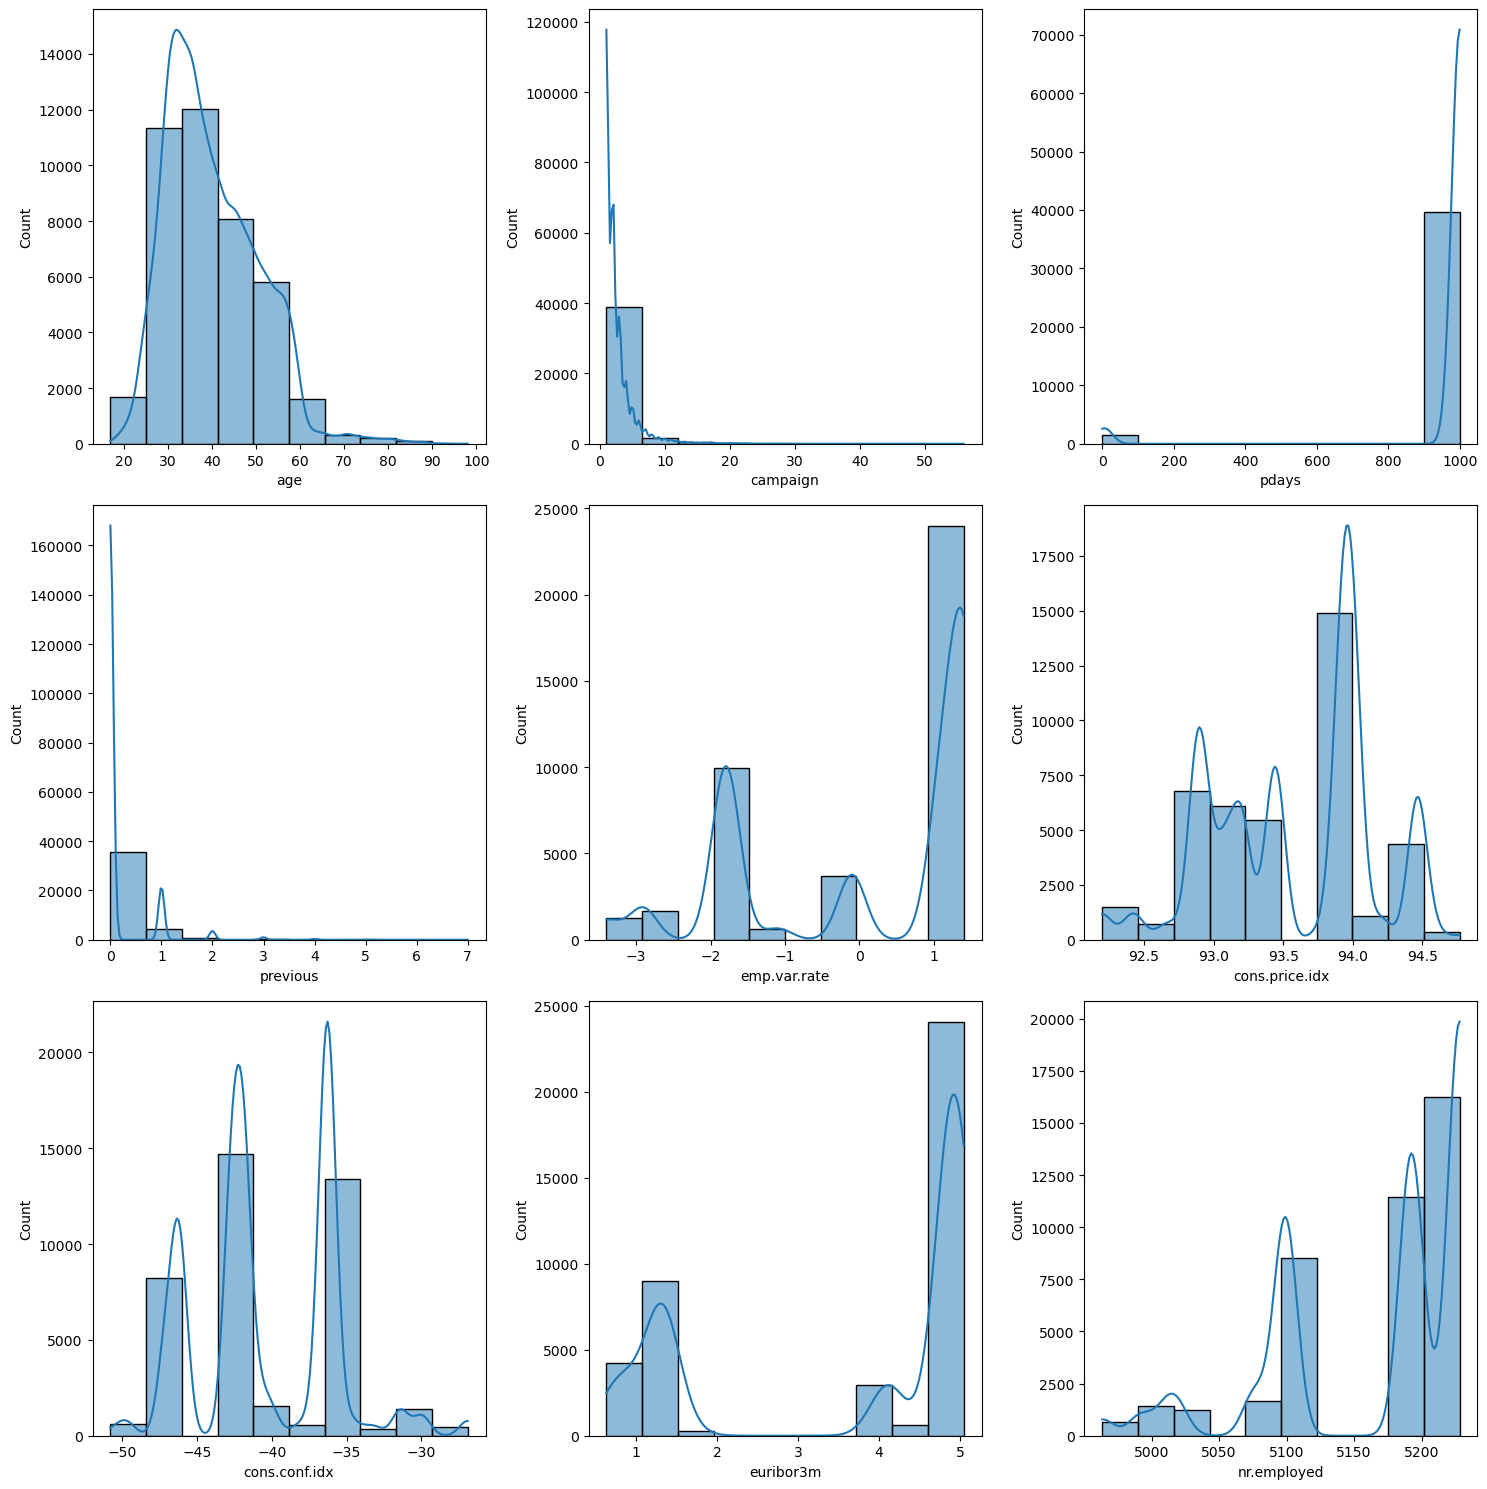

In [110]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)  
fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,5*n_rows))
axes = axes.flatten()

for idx, i in enumerate(col):
     sns.histplot(df[i],ax=axes[idx],bins =10,kde=True)
     axes[idx].set_xlabel(i)

for j in range(idx+1,len(axes)):
     fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()
   

### Look at the correlation between the variables

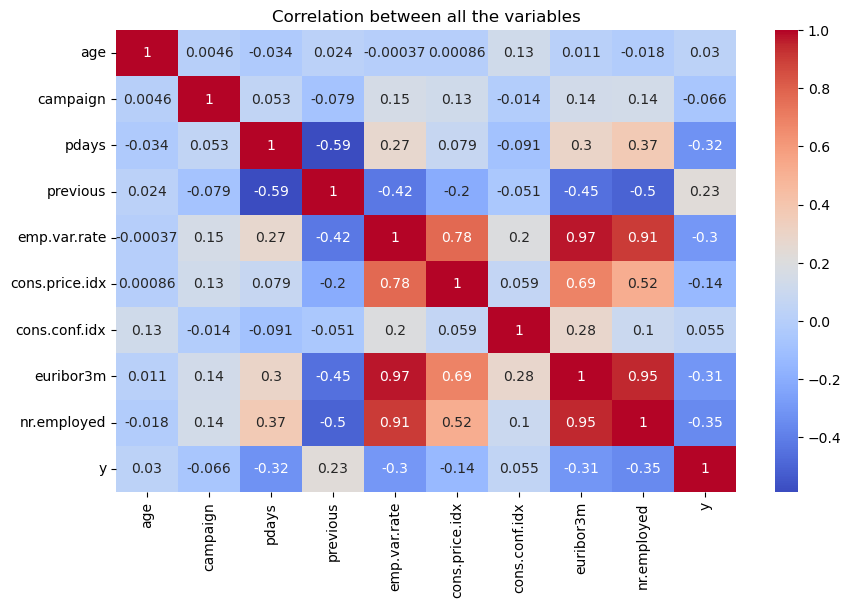

In [111]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()

So, we can see that nr.employed, emp.var.rate, and euribor3m are really highly correlated with each other (because demographical data). I choose to drop 2 of them: emp.var.rate, euribor3m and keep nr.employed. (because it is something the bank can control, moreover, out of the 3 variables, nr.employed is the one that seems to have the most impact on our target variable (seem belong))

Now look at the correlation heatmap between the variable and y

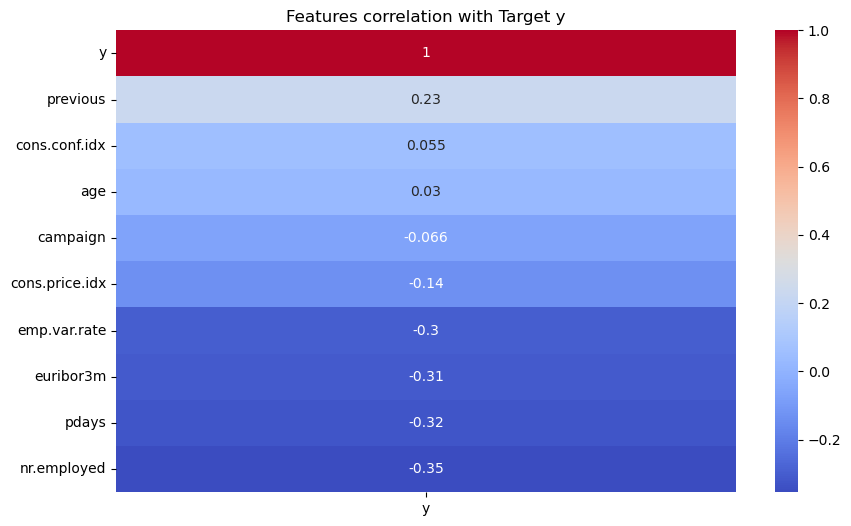

In [112]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['y']].sort_values(by='y',ascending=False),annot=True,cmap='coolwarm')
plt.title('Features correlation with Target y')
plt.show()

So we can expect the number of time the client was contacted ('previous') has also a high positive impact on y, and the consumer index too.

On the negative impact side, we can guess that the more the number of employees ('nr.employed') was the less there is a successful subcription. Also, number of days that passed by after the client was last contacted from a previous campaign ('pdays'), the less the client will suscribe. 

So we can guess, it's important to maintain a good and frequent contact with the clients in order to subscribe more. Now, we will analyse more deeply to confirm or not our guess.


### Clean the Data

Drop the column

In [113]:
df.drop('emp.var.rate',axis=1,inplace=True)
df.drop('euribor3m',axis=1,inplace=True)

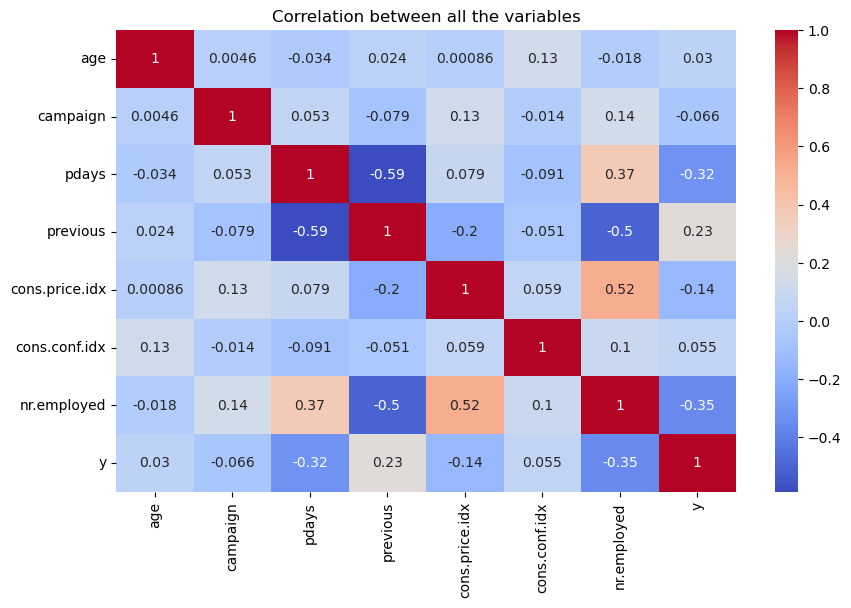

In [114]:
# check the correlation matrix again
corr_matrix2 = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()
# ok looks there is not extreme correlations anymore 

Look at duplicate and drop them

In [115]:
duplicates = df[df.duplicated(keep=False)] 
#print(duplicates) --> yes, some duplicate ex: rows 10 and 7 
duplicates.shape

df = df.drop_duplicates().reset_index(drop=True)
df.shape

(38832, 18)

For the columns 'default', 'housing', 'loan', we transform the values 'yes', 'no', 'unknown' to 1,0,-1. 


In [116]:
# for all the columns with yes, no, unknown we transform to 1,0,-1
def binary_clean(column):
    df[column]=df[column].replace({'yes':1,'no':0,'unknown':-1})

In [117]:
column_name = ['default','housing','loan']

for i in column_name:
    binary_clean(i)

In [118]:
for i in df:
    print(f'{i}: {df[i].unique()}')

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: [ 0 -1  1]
housing: [ 0  1 -1]
loan: [ 0  1 -1]
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16


For the columns who values have order, we label encoded them (columns: 'education','month','day_of_week')

In [119]:
def label_encode(df,columns,order=None):
    label_encoder = LabelEncoder()
    label_encoder.fit(order if order else df[columns].unique())
    df[columns]= label_encoder.transform(df[columns])

In [120]:
label_encode(df,'education',order=['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course','unknown'])
label_encode(df,'month',order=['mar','apr','may','jun','jul','aug', 'sep','oct','nov','dec'])
label_encode(df,'day_of_week',order=['mon','tue','wed','thu','fri'])

For columns 'poutcome' we transform into '1' for success, '0' for failure and '-1' for nonexistent

In [121]:
df['poutcome'] = df['poutcome'].replace({'success':1,'failure':0,'nonexistent':-1})

Now we one-hot encode the remaining columns (they do not contains any order)

In [122]:
def one_hot(df,colonne):

    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=colonne, drop_first=True)
    
    return df

In [123]:
columns = ['job','marital','contact']
df = one_hot(df,columns)

In [124]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column education: [0 3 1 2 5 7 6 4]
column default: [ 0 -1  1]
column housing: [ 0  1 -1]
column loan: [ 0  1 -1]
column month: [6 4 3 1 8 7 2 5 0 9]
column day_of_week: [1 3 4 2 0]
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
column pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
column previous: [0 1 2 3 4 5 6 7]
column poutcome: [-1  0  1]
column cons.price.idx: [93.99 94.47 93.92 93.44 93.8  93.2  92.76 92.84 93.08 92.89 92.96 92.47
 92.2  92.38 92.43 92.65 92.71 93.37 93.75 93.88 94.06 94.22 94.03 94.2
 94.6  94.77]
column cons.conf.idx: [-36.4 -41.8 -42.7 -36.1 -40.

In [143]:
df.describe()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone,pre_cont
count,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,...,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000
mean,40.164916,3.739133,-0.210548,0.496807,0.133292,4.264756,1.995365,2.633833,960.285100,0.181139,...,0.096673,0.021863,0.161800,0.025494,0.008344,0.604965,0.278739,0.002034,0.372296,0.038988
std,10.491457,2.138609,0.407893,0.548106,0.407372,2.316573,1.398605,2.830577,192.213253,0.506248,...,0.295516,0.146239,0.368272,0.157623,0.090963,0.488865,0.448385,0.045059,0.483423,0.193570
min,17.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,3.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,6.000000,0.000000,1.000000,0.000000,6.000000,3.000000,3.000000,999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,98.000000,7.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
df['default'].value_counts()

 0    30650
-1     8179
 1        3
Name: default, dtype: int64

For the column 'pdays' if the clients was not contacted previously, the 'pdays'=999. It's an extreme value compare to others values that are betwwen 6 to 20. So, we will create a binary variable to know if the client was contacted previously or not in order to grasp this information in our dataset 

In [126]:
prev_contact=df['pdays']!=999

for index,i in enumerate(prev_contact):
    if i:
        df.loc[index,'pre_cont']=1
    else:
        df.loc[index,'pre_cont']=0


In [127]:
from sklearn.preprocessing import StandardScaler

## Split our data set into train, test set

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [129]:
df = shuffle(df, random_state=42).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

x_train.head()
y_train.head()
x_test.head()


,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
2617,46,2,0,1,0,4,3,2,999,0,...,0,0,0,0,1,0,1,0,0,0
6608,76,0,0,0,0,1,3,1,999,1,...,0,0,0,0,0,0,0,0,0,0
21115,27,3,0,1,0,3,0,1,999,0,...,0,0,0,0,0,0,0,1,0,1
35501,57,6,-1,1,0,1,4,8,999,0,...,0,0,0,1,0,0,0,1,0,0
9087,52,5,0,1,0,7,0,1,999,1,...,0,0,0,1,0,0,1,0,0,0


To avoid data leakage we will apply feature scaling after the split. So, we will fit and transform with the x_train and only transform for the x_test

### Feature scalling

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
columns_scale = ['age','campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[columns_scale])
x_test_scaled = scaler.transform(x_test[columns_scale])
x_train[columns_scale] = x_train_scaled
x_test[columns_scale] = x_test_scaled

x_train.head()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
13067,-0.400861,5,0,1,0,6,1,-0.573603,0.201836,0,...,0,0,0,1,0,0,0,1,0,0
37452,1.128754,6,0,-1,-1,1,2,-0.225326,0.201836,0,...,0,0,0,0,0,0,1,0,0,0
28885,0.268345,1,0,1,1,3,4,0.471229,0.201836,0,...,0,0,0,0,0,0,0,1,0,0
24650,0.841951,6,0,0,0,4,3,1.167784,0.201836,0,...,0,0,0,0,0,0,1,0,0,1
19138,1.033153,0,-1,1,1,3,1,0.122952,0.201836,0,...,0,0,0,0,0,0,1,0,0,0


The goal of this case is to a the model and provide insight into which features/variables influence the outcome of the classification the most: on a global level, and specifically for observation #4 and #20.

Based on that, a decision trees or a deep learning model, will be more difficult to observe which features/variables influence the outcome. 

Therefore, the logisitc regression is chosen


### Logistic Regression

Use a logisitc regression with imbalanced data and with regularization (using Lasso)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
model = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)


In [134]:
test_accuracy = accuracy_score(y_test,y_pred)
train_accuracy = accuracy_score(y_train,y_pred_train)
print(f'the test accuracy is {test_accuracy} \nthe train accuracy is {train_accuracy}')

the test accuracy is 1.0 
the train accuracy is 1.0


In [135]:
y_test.unique()

array([1, 0], dtype=int64)

In [136]:
# check that the prediction and the true value are the same 
check = pd.concat([pd.Series(y_pred, name="Predicted",index=y_test.index), y_test], axis=1)
print(check.head(100))
y_test_numpy = y_test.to_numpy()

any(y_pred!=y_test_numpy) #return False, so predict everything correctly

       Predicted  y
2617           1  1
6608           1  1
21115          0  0
35501          0  0
9087           0  0
...          ... ..
6853           0  0
926            0  0
6275           0  0
36940          0  0
19065          0  0

[100 rows x 2 columns]


False

#### Cross validation with logistic regression

In [137]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate model performance
model_cross = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
cross_val_scores = cross_val_score(model_cross, x_train, y_train, cv=6)

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


#### Confusion matrix

In [138]:
cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
np.set_printoptions(precision=2)
print(cnf_matrix)

[[ 1407     0]
 [    0 10243]]


#### Classification Report

In [139]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  10243.0
1                   1.0     1.0       1.0   1407.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  11650.0
weighted avg        1.0     1.0       1.0  11650.0


In [43]:
# If you don't have eli5, you 
%pip install -U eli5

Note: you may need to restart the kernel to use updated packages.


In [140]:
feature_names = x_train.columns

In [141]:
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)  # Sort by impact
print(coef_df)

              Feature  Coefficient
14                  y    13.493253
19        job_retired     0.133731
2             default     0.111383
22        job_student     0.079649
27     marital_single     0.055608
12      cons.conf.idx     0.047230
11     cons.price.idx     0.029073
6         day_of_week     0.018087
1           education     0.013305
28    marital_unknown     0.010020
26    marital_married     0.005860
0                 age     0.005586
16   job_entrepreneur    -0.006813
18     job_management    -0.009038
24     job_unemployed    -0.010205
4                loan    -0.011123
3             housing    -0.011464
23     job_technician    -0.014389
25        job_unknown    -0.020344
20  job_self-employed    -0.020636
17      job_housemaid    -0.031859
5               month    -0.041428
21       job_services    -0.042646
15    job_blue-collar    -0.048350
9            previous    -0.059846
7            campaign    -0.079600
10           poutcome    -0.108413
8               pday

Or another method that is nicer

In [ ]:
#explanation = eli5.explain_weights(model, feature_names=x_train.columns.tolist())
import eli5
eli5.show_weights(model, feature_names=x_train.columns.tolist())


#### Interpretation

We can see that retired individuals ('job_retired'), who are typically older, tend to subscribe more to a term deposit after a call. Additionally, if a client has previously had a credit default ('default'), there is a higher chance that they will subscribe to a term deposit after a call. While a default may indicate financial difficulties, it could also suggest that the person is willing to take risks and invest in a term deposit to stabilize their financial situation.

On the other hand, the overall economic situation also influences the likelihood of subscribing to a term deposit. When the quarterly 'nr.employed' (number of employees) is high, clients are less likely to subscribe. This suggests that during periods of high employment, people feel more financially confident and prefer higher-return investments, such as stocks, rather than term deposits.

Lastly, contacting clients via a landline telephone instead of a cellular (mobile) phone reduces the likelihood of them subscribing to a deposit. Even back then, there was already a shift from landlines to mobile phones. Moreover, the longer you wait before reaching out to a client, the less likely they are to subscribe. Therefore, a proactive approach in client communication is more effective. 

### Features/variables influence the outcome of the classification for observation specific observation #4 and #20.

Now let's see two specific features to see the features that influence these observations: #4 and #20

In [165]:
eli5.show_prediction(model, x_train.iloc[4], feature_names=x_train.columns.tolist())

In [166]:
# Explain prediction for observation #20
eli5.show_prediction(model, x_train.iloc[20], feature_names=x_train.columns.tolist())

In [168]:
print(y_train.iloc[4])
print(y_train.iloc[20])

0
0


Here our two clients, do not subcribe to the bank deposit. It depends mostly on the month (when the client was contacted), nrb employed, default and pdays (the last contact of the client). Therefore, it's always important to have regular contact with the client, and also target the right period

Note:
When we analyse on a specific observation, (e.g., x_train.iloc[4]), the importance of each feature depends on its value for that specific instance.
A feature that is globally positive might have a negative effect on one specific observation because it interacts with other feature values.

Thanks for ready my notebook :)